In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Imputer

In [2]:
data=pd.read_csv("./data_copy.csv",encoding="gbk")

In [3]:
np.shape(data)

(4754, 90)

In [4]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018051e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018051e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018051e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018051e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018051e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [5]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)

bank_card_no
reg_preference_for_trad
source
id_name
latest_query_time
loans_latest_time


In [6]:
data_s = pd.DataFrame(data, columns=['bank_card_no','reg_preference_for_trad','source','id_name','latest_query_time','loans_latest_time'])

In [7]:
data_s.head()

,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,卡号1,一线城市,xs,蒋红,2018-04-25,2018-04-19
1,卡号1,一线城市,xs,崔向朝,2018-05-03,2018-05-05
2,卡号1,一线城市,xs,王中云,2018-05-05,2018-05-01
3,卡号1,三线城市,xs,何洋洋,2018-05-05,2018-05-03
4,卡号1,一线城市,xs,赵洋,2018-04-15,2018-01-07


In [8]:
data_s['source'].value_counts()

xs    4754
Name: source, dtype: int64

In [9]:
miss=data.isnull().sum()
miss_rate=data.isnull().sum()/data.shape[0]
pd.concat([miss,miss_rate],axis=1,keys=['缺失值','缺失率'])

,缺失值,缺失率
Unnamed: 0,0,0.000000
custid,0,0.000000
trade_no,0,0.000000
bank_card_no,0,0.000000
low_volume_percent,2,0.000421
middle_volume_percent,2,0.000421
take_amount_in_later_12_month_highest,0,0.000000
trans_amount_increase_rate_lately,3,0.000631
trans_activity_month,2,0.000421
trans_activity_day,2,0.000421


In [10]:
data['trade_no']

0       2.018051e+31
1       2.018051e+31
2       2.018051e+31
3       2.018051e+31
4       2.018051e+31
5       2.018051e+31
6       2.018051e+31
7       2.018051e+31
8       2.018051e+31
9       2.018050e+31
10      2.018051e+31
11      2.018051e+31
12      2.018051e+31
13      2.018051e+31
14      2.018051e+31
15      2.018051e+31
16      2.018051e+31
17      2.018051e+31
18      2.018051e+31
19      2.018051e+31
20      2.018051e+31
21      2.018051e+31
22      2.018050e+31
23      2.018051e+31
24      2.018051e+31
25      2.018050e+31
26      2.018051e+31
27      2.018051e+31
28      2.018051e+31
29      2.018051e+31
            ...     
4724    2.018051e+31
4725    2.018051e+31
4726    2.018050e+31
4727    2.018051e+31
4728    2.018051e+31
4729    2.018051e+31
4730    2.018051e+31
4731    2.018051e+31
4732    2.018051e+31
4733    2.018051e+31
4734    2.018051e+31
4735    2.018051e+31
4736    2.018051e+31
4737    2.018050e+31
4738    2.018051e+31
4739    2.018050e+31
4740    2.018

In [11]:
#删除部分列
data=data.drop(['Unnamed: 0','custid','id_name','bank_card_no','source','student_feature','trade_no'], axis = 1)

In [12]:
#处理缺失值,用'其他城市'填充
data['reg_preference_for_trad'].fillna("其他城市",inplace=True)

#使用onehot编码
data = data.join(pd.get_dummies(data['reg_preference_for_trad']))
data.drop(['reg_preference_for_trad'],axis = 1,inplace = True)

In [13]:
#将时间序列object 修改为 时间序列
data['latest_query_time'] = pd.to_datetime(data['latest_query_time'], format='%Y-%m-%d %H:%M:%S.%f')
data['loans_latest_time'] = pd.to_datetime(data['loans_latest_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [14]:
#将时间序列 修改为int
import datetime
a = (datetime.datetime.today() - data['loans_latest_time'])
b = map(lambda a:a.days, a)
data['loans_latest_time'] = pd.Series(b)

a = (datetime.datetime.today() - data['latest_query_time'])
b = map(lambda a:a.days, a)
data['latest_query_time'] = pd.Series(b)

In [15]:
#筛选无关特征，相关系数
corr=data.corr()
corr_1=np.abs(corr['status'])
data_c=data[corr_1.sort_values(ascending=False)[:70].index]

In [16]:
data_c.isnull().sum()

status                                          0
trans_fail_top_count_enum_last_1_month         16
history_fail_fee                              297
loans_overdue_count                           297
loans_score                                   297
latest_one_month_fail                         297
apply_score                                   304
rank_trad_1_month                               2
latest_one_month_suc                          297
trans_fail_top_count_enum_last_6_month         16
trans_fail_top_count_enum_last_12_month        16
top_trans_count_last_1_month                    2
consfin_avg_limit                             297
consfin_credit_limit                          297
trans_day_last_12_month                         2
avg_price_top_last_12_valid_month             104
trans_top_time_last_1_month                     8
consume_top_time_last_1_month                   8
consfin_max_limit                             297
latest_six_month_loan                         297


In [17]:
#用中值进行填充,致谢ruaruaxia思路
for i in data_c.keys():
    data_c[i].fillna(data_c[i].median(), inplace=True)
data_c.isnull().sum().sort_values(ascending=False)

/home/m/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/m/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/m/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


cross_consume_count_last_1_month              0
avg_price_last_12_month                       0
latest_six_month_loan                         0
latest_query_time                             0
latest_query_day                              0
query_cash_count                              0
latest_three_month_loan                       0
low_volume_percent                            0
loans_count                                   0
consume_top_time_last_1_month                 0
max_cumulative_consume_later_1_month          0
number_of_trans_from_2011                     0
first_transaction_day                         0
middle_volume_percent                         0
first_transaction_time                        0
historical_trans_day                          0
consfin_max_limit                             0
trans_top_time_last_1_month                   0
loans_long_time                               0
rank_trad_1_month                             0
trans_fail_top_count_enum_last_1_month  

In [18]:
y=data_c['status']
X=data_c.drop('status',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2018)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

/home/m/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[-0.85540966, -0.6364168 ,  0.56009864, ...,  0.18578577,
         0.66553853, -0.27461939],
       [-0.33974597, -0.3409557 , -0.72260531, ...,  0.32271737,
         0.45975352, -0.27461939],
       [ 1.72290883,  1.30518474,  0.88077462, ...,  0.04885417,
         0.57734496, -0.27461939],
       ...,
       [ 2.23857253, -0.6364168 , -0.72260531, ..., -0.63580384,
         0.31276423, -0.27461939],
       [ 0.17591773, -0.55199934, -0.72260531, ..., -0.08807744,
        -0.12820365, -0.27461939],
       [ 0.17591773,  0.96751491,  1.20145061, ...,  0.32271737,
         0.31276423, -0.27461939]])

In [21]:
def model_metrics(model, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_train_proba = model.predict_proba(X_train)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

[准确率] 训练集： 0.8515 测试集： 0.7828
[精准率] 训练集： 0.8542 测试集： 0.6172
[召回率] 训练集： 0.4916 测试集： 0.3593
[f1-score] 训练集： 0.6240 测试集： 0.4542
[auc值] 训练集： 0.9101 测试集： 0.7737


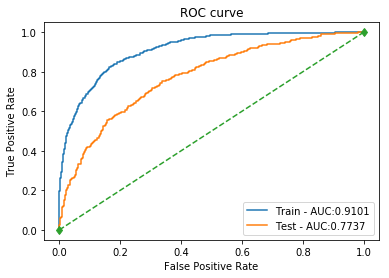

In [23]:
#XGBoost
from xgboost import XGBClassifier as XGBC
clf = XGBC().fit(X_train,y_train)
model_metrics(clf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7493 测试集： 0.7484
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.5791 测试集： 0.5701


/home/m/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


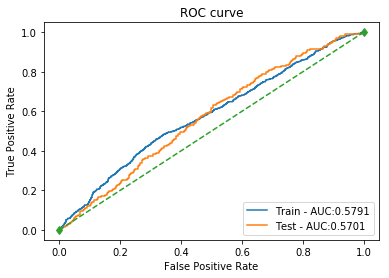

In [24]:
#逻辑回归
from sklearn.linear_model import LogisticRegression as LR
lr=LR().fit(X_train,y_train)
model_metrics(lr, X_train, X_test, y_train, y_test)

/home/m/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[准确率] 训练集： 0.7493 测试集： 0.7484
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.5000 测试集： 0.5000


/home/m/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


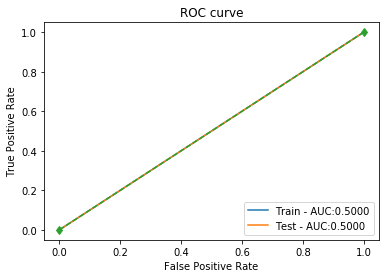

In [25]:
#svm
from sklearn import svm
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)
svm_sigmoid.fit(X_train,y_train)
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 1.0000 测试集： 0.6875
[精准率] 训练集： 1.0000 测试集： 0.3840
[召回率] 训练集： 1.0000 测试集： 0.4011
[f1-score] 训练集： 1.0000 测试集： 0.3924
[auc值] 训练集： 1.0000 测试集： 0.5924


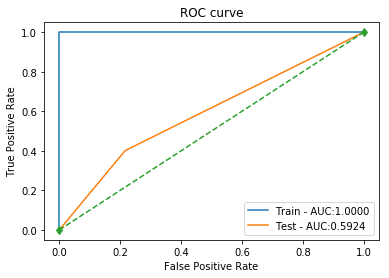

In [26]:
#决策树
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
model_metrics(dtc, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.9823 测试集： 0.7708
[精准率] 训练集： 1.0000 测试集： 0.6081
[召回率] 训练集： 0.9293 测试集： 0.2507
[f1-score] 训练集： 0.9633 测试集： 0.3550
[auc值] 训练集： 0.9997 测试集： 0.7094


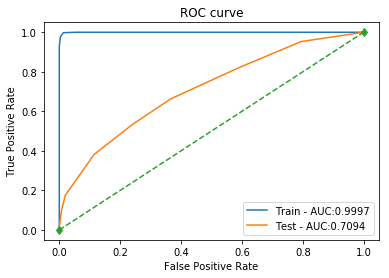

In [27]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
model_metrics(rfc, X_train, X_test, y_train, y_test)